# British Airways Analysis

### 1. Data/Domain Understanding and Exploration

In [ ]:
!pip install -U scikit-learn==1.4.0 -q
!pip install --upgrade category_encoders -q
!pip install shap

# import the necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from category_encoders import TargetEncoder
sklearn.set_config(transform_output="pandas")
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

import warnings
warnings.filterwarnings('ignore')
sns.set(
    { "figure.figsize": (5, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.1 MB/s eta 0:00:00


In [ ]:
# The file
customer_booking = pd.read_csv('/content/drive/MyDrive/customer_booking.csv', encoding='ISO-8859-1')

In [ ]:
# See the structure of the dataset
customer_booking.head(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0


### Understanding the various features

In [ ]:
customer_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

It appears there is no missing value amongst any of the columns. Getting a summary of the dataset, showcases the instant representation.

In [ ]:
customer_booking.describe(include = 'all')

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000,50000,50000.000000,50000.00000,50000.00000,50000,50000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,NaN,2,3,NaN,NaN,NaN,7,799,104,NaN,NaN,NaN,NaN,NaN
top,NaN,Internet,RoundTrip,NaN,NaN,NaN,Mon,AKLKUL,Australia,NaN,NaN,NaN,NaN,NaN
freq,NaN,44382,49497,NaN,NaN,NaN,8102,2680,17872,NaN,NaN,NaN,NaN,NaN
mean,1.591240,NaN,NaN,84.940480,23.04456,9.06634,NaN,NaN,NaN,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,NaN,NaN,90.451378,33.88767,5.41266,NaN,NaN,NaN,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,NaN,NaN,0.000000,0.00000,0.00000,NaN,NaN,NaN,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,NaN,NaN,21.000000,5.00000,5.00000,NaN,NaN,NaN,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,NaN,NaN,51.000000,17.00000,9.00000,NaN,NaN,NaN,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,NaN,NaN,115.000000,28.00000,13.00000,NaN,NaN,NaN,1.000000,1.000000,1.000000,8.830000,0.000000


Clearly the numerical variables show skewness which could have been as a result of outliers given the extreme values veering off from the median. This would imply the infusion of interquartile range to handle outliers.

### Data Preparation and Preprocessing

Removing Outliers

In [ ]:
# creating function to handle outliers in multiple columns in the dataframe
def outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

columns = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour']
# generates bounds for each column to filter outliers
condition = pd.Series([True] * len(customer_booking))

for col in columns:
    lower_bound, upper_bound = outliers(customer_booking[col])
    condition &= (customer_booking[col] >= lower_bound) & (customer_booking[col] <= upper_bound)

# new customer_booking dataframe
customer_booking = customer_booking[condition]

In [ ]:
customer_booking.describe(include = 'all')

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,40456.000000,40456,40456,40456.000000,40456.000000,40456.000000,40456,40456,40456,40456.000000,40456.000000,40456.000000,40456.000000,40456.000000
unique,NaN,2,3,NaN,NaN,NaN,7,784,101,NaN,NaN,NaN,NaN,NaN
top,NaN,Internet,RoundTrip,NaN,NaN,NaN,Mon,AKLKUL,Australia,NaN,NaN,NaN,NaN,NaN
freq,NaN,35716,40046,NaN,NaN,NaN,6401,1839,14963,NaN,NaN,NaN,NaN,NaN
mean,1.392476,NaN,NaN,66.531293,16.184546,9.060980,NaN,NaN,NaN,0.647123,0.293183,0.419270,7.245702,0.148804
std,0.602764,NaN,NaN,61.898178,14.270845,5.393883,NaN,NaN,NaN,0.477871,0.455227,0.493446,1.500941,0.355899
min,1.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,NaN,NaN,20.000000,5.000000,5.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,NaN,NaN,46.000000,6.000000,9.000000,NaN,NaN,NaN,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,NaN,NaN,95.000000,25.000000,13.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,8.830000,0.000000


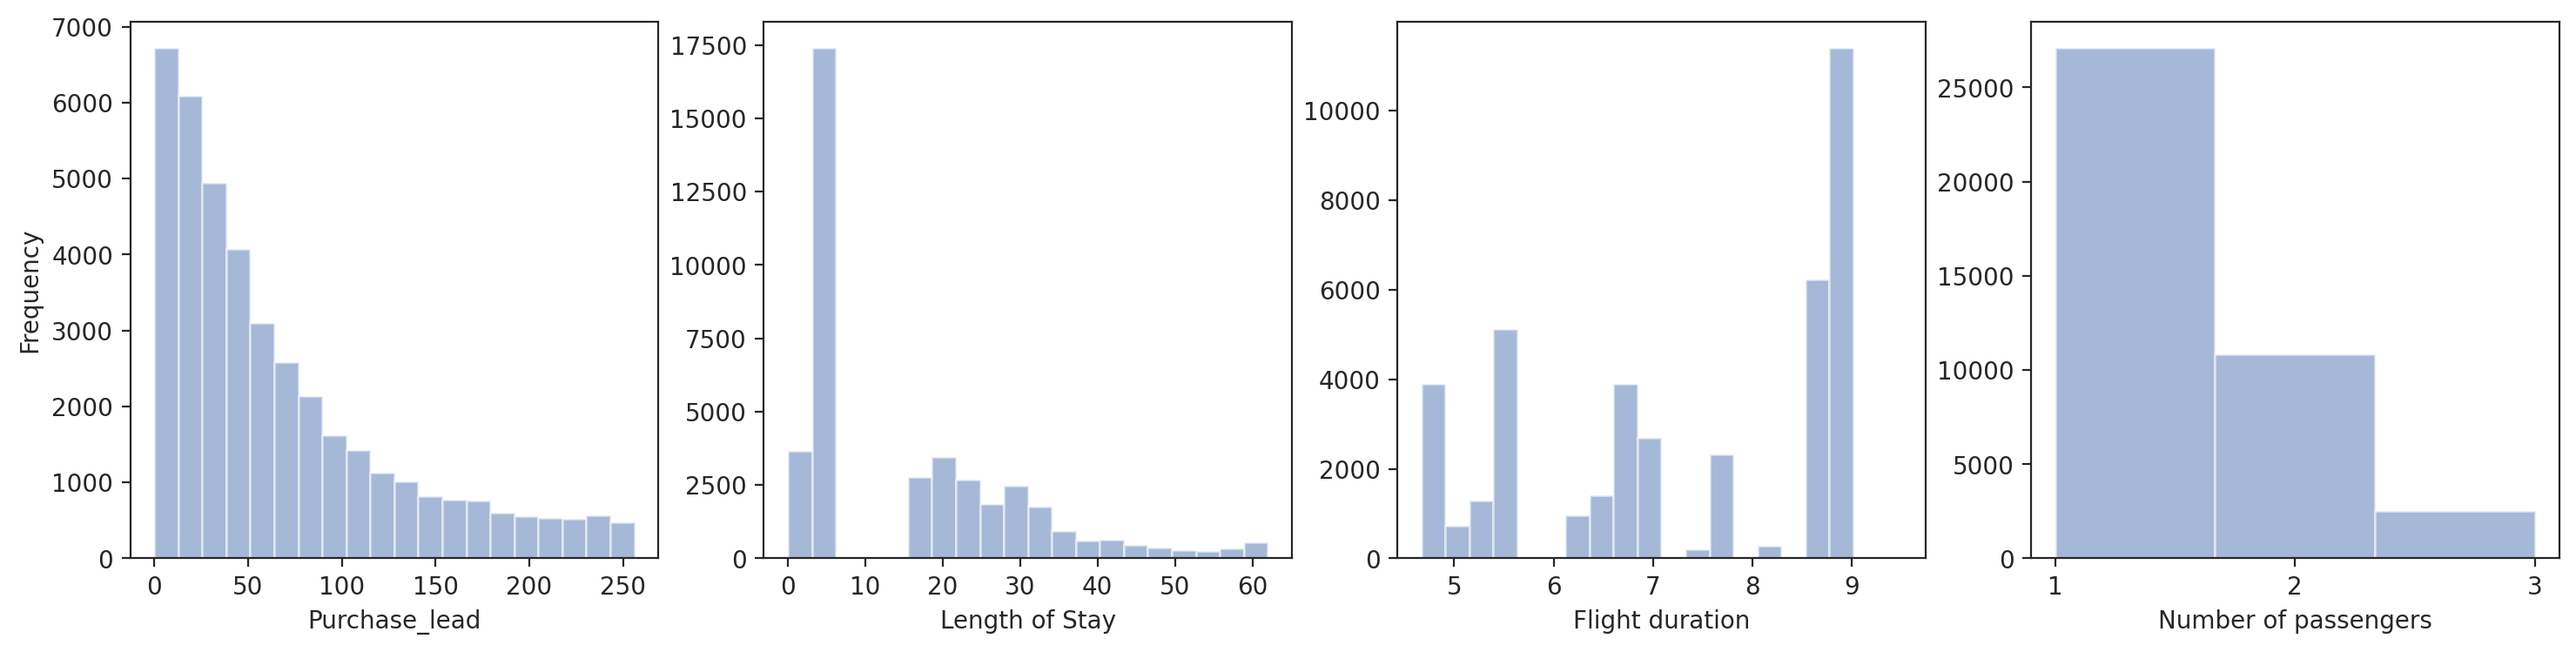

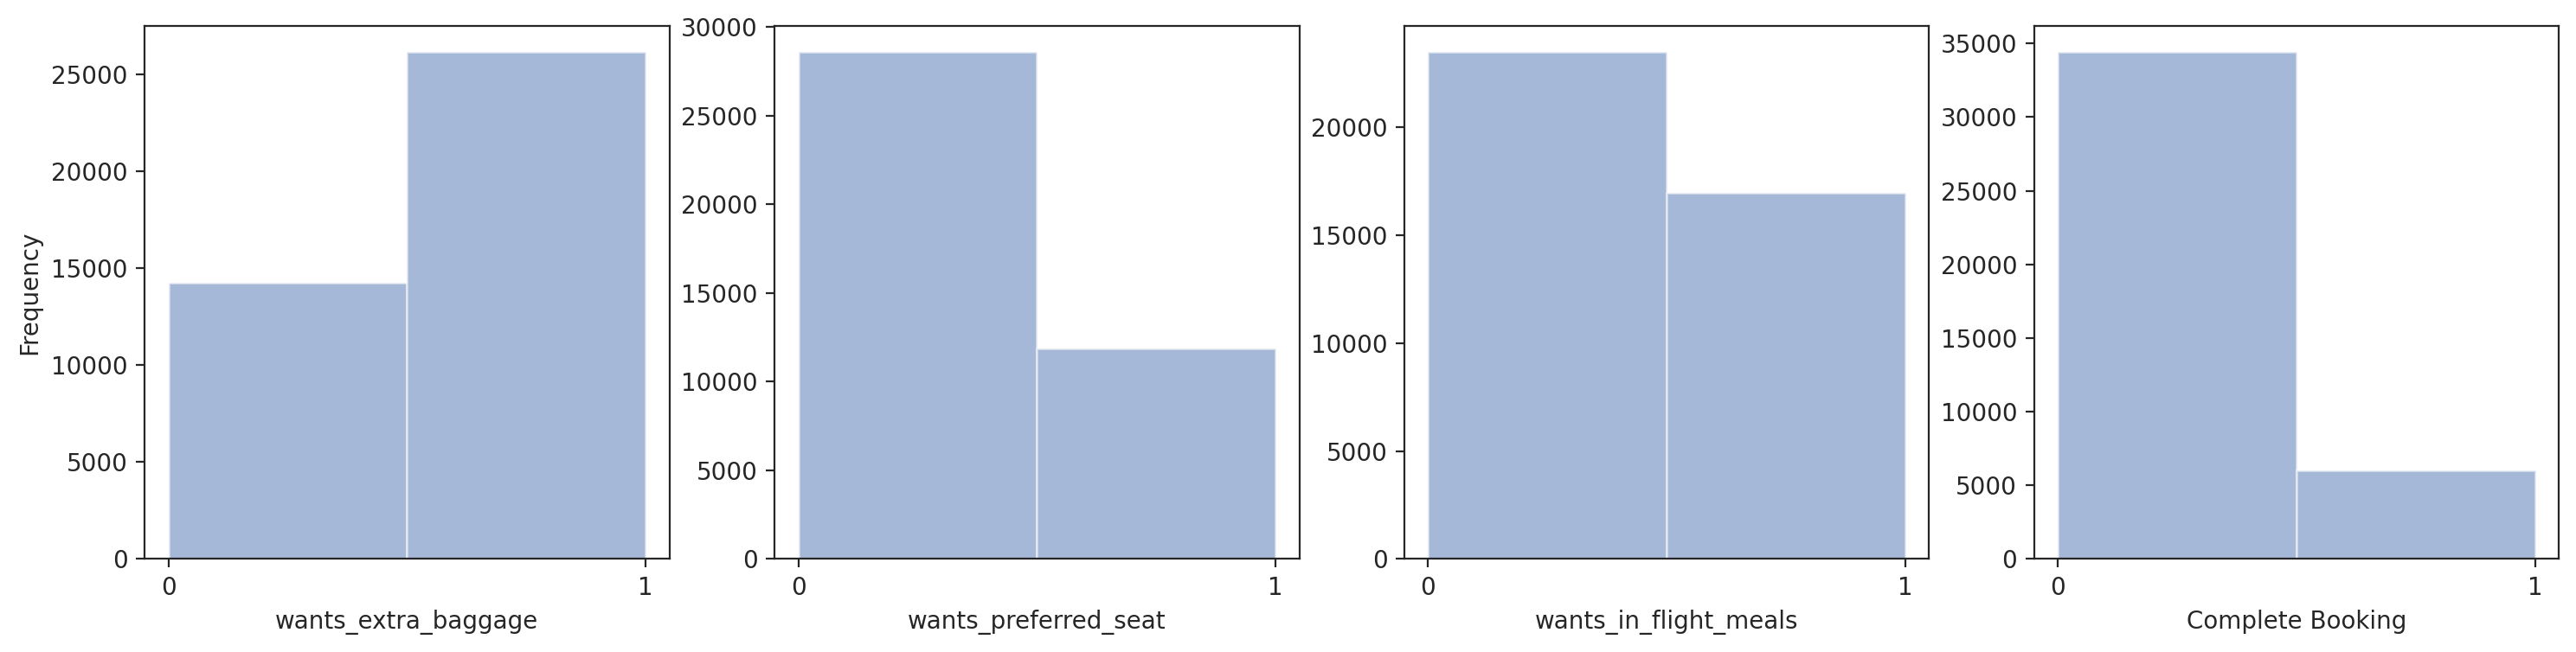

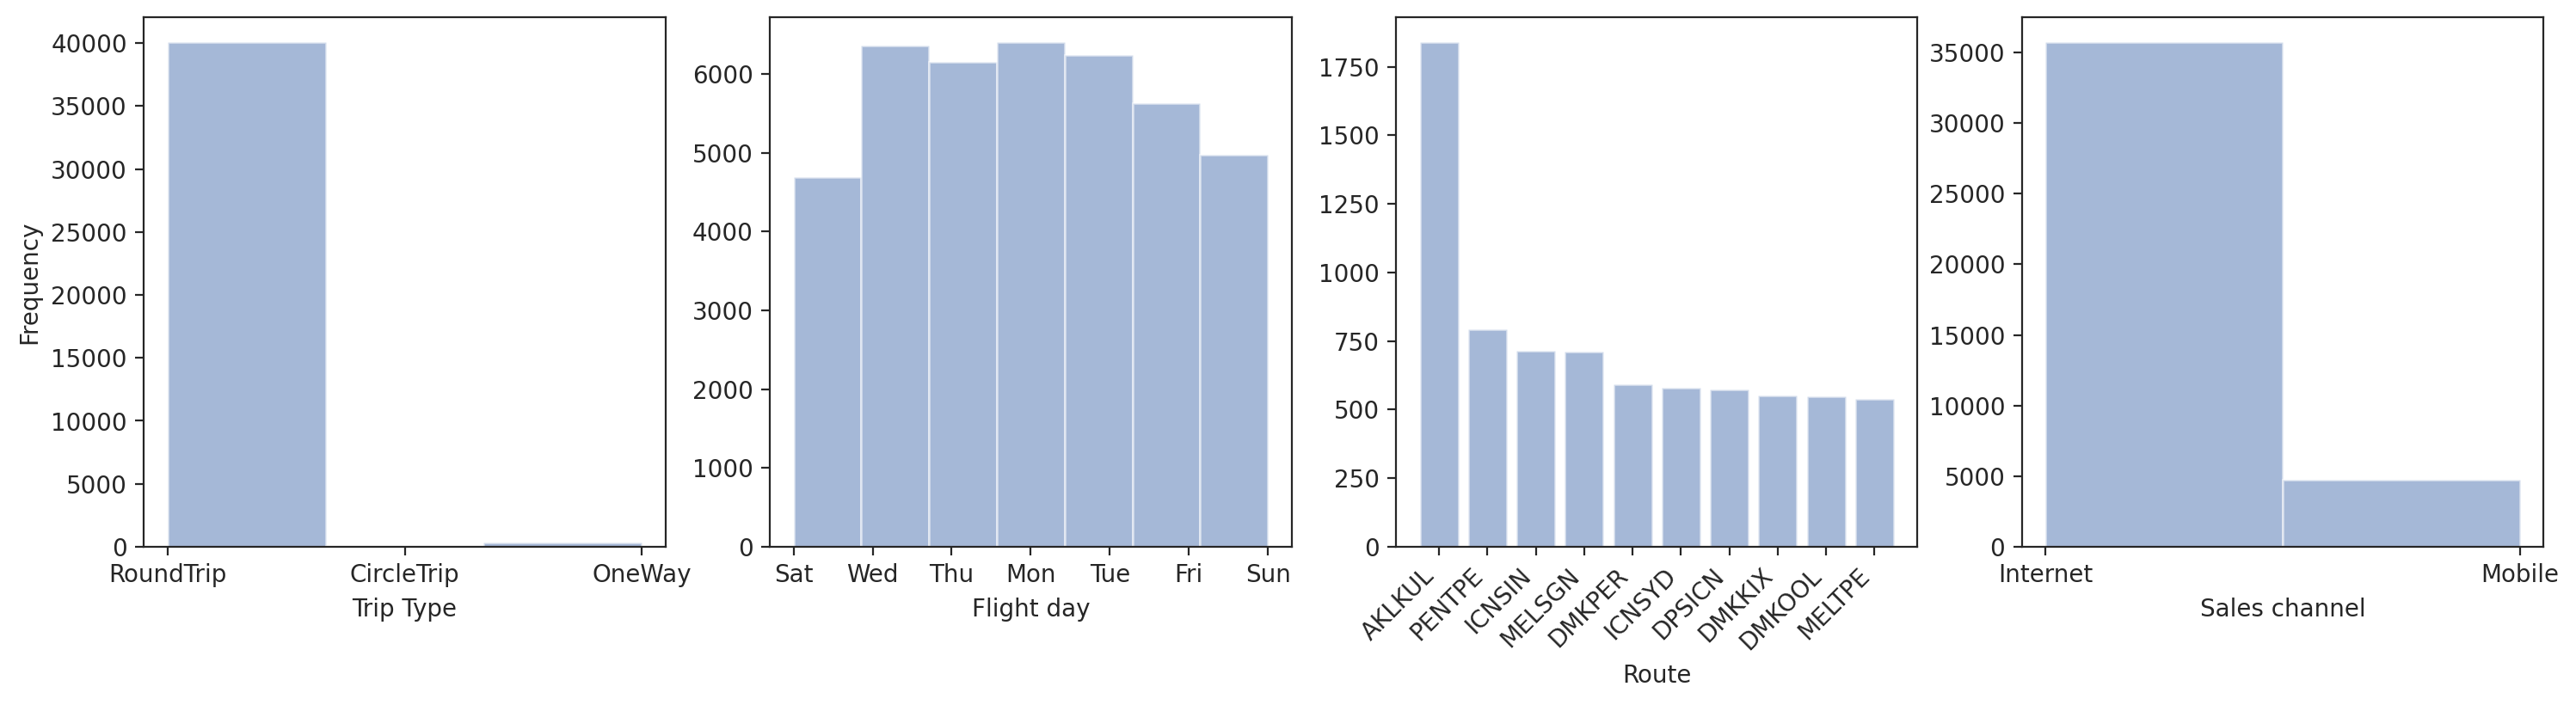

In [ ]:
# Visualizing the distribution of continuous columns
fig, axs = plt.subplots(1, 4, figsize=(18, 4))
axs[0].hist(customer_booking['purchase_lead'], bins=20, alpha = 0.5)
axs[0].set_xlabel('Purchase_lead')
axs[0].set_ylabel('Frequency')
axs[0].ticklabel_format(style='plain')
axs[1].hist(customer_booking['length_of_stay'], bins=20, alpha = 0.5)
axs[1].set_xlabel('Length of Stay')
axs[1].ticklabel_format(style='plain')
axs[2].hist(customer_booking['flight_duration'], bins=20, alpha = 0.5)
axs[2].set_xlabel('Flight duration');
axs[3].hist(customer_booking['num_passengers'], bins=3, alpha = 0.5)
axs[3].set_xlabel('Number of passengers')
axs[3].set_xticks([1, 2, 3]);

# Visualizing the distribution of categorical columns
fig, axs = plt.subplots(1, 4, figsize=(18, 4))
axs[0].hist(customer_booking['wants_extra_baggage'], bins=2, alpha = 0.5)
axs[0].set_xlabel('wants_extra_baggage')
axs[0].set_ylabel('Frequency')
axs[0].ticklabel_format(style='plain')
axs[0].set_xticks([0, 1])
axs[1].hist(customer_booking['wants_preferred_seat'], bins=2, alpha = 0.5)
axs[1].set_xlabel('wants_preferred_seat')
axs[1].ticklabel_format(style='plain')
axs[1].set_xticks([0, 1])
axs[2].hist(customer_booking['wants_in_flight_meals'], bins=2, alpha = 0.5)
axs[2].set_xlabel('wants_in_flight_meals')
axs[2].set_xticks([0, 1])
axs[3].hist(customer_booking['booking_complete'], bins=2, alpha = 0.5)
axs[3].set_xlabel('Complete Booking')
axs[3].set_xticks([0, 1])

# Using groupby and size to calculate route frequencies
route_counts = customer_booking.groupby('route').size().sort_values(ascending=False).head(10)
fig, axs = plt.subplots(1, 4, figsize=(18, 4))
axs[0].hist(customer_booking['trip_type'], bins=3, alpha = 0.5)
axs[0].set_xlabel('Trip Type')
axs[0].set_ylabel('Frequency')
axs[1].hist(customer_booking['flight_day'], bins=7, alpha = 0.5)
axs[1].set_xlabel('Flight day')
axs[2].bar(route_counts.index, route_counts.values, alpha=0.5)
axs[2].set_xlabel('Route')
axs[2].set_xticklabels(route_counts.index, rotation=45, ha='right')
axs[3].hist(customer_booking['sales_channel'], bins=2, alpha = 0.5)
axs[3].set_xlabel('Sales channel');

Segmenting the dataset to view customers who book in advance and stay in different periods

In [ ]:
#customers who book within twelve months
customer12 = customer_booking[(customer_booking['purchase_lead'] < 360)]
len(customer12)

40456

In [ ]:
#customers who book within six months
customer6 = customer_booking[(customer_booking['purchase_lead'] < 180)]
len(customer6)

37200

In [ ]:
#customers who book within three months
customer3 = customer_booking[(customer_booking['purchase_lead'] < 90)]
len(customer3)

29660

In [ ]:
#customers who book within one month
customer1 = customer_booking[(customer_booking['purchase_lead'] < 30)]
len(customer1)

14516

In [ ]:
#last minute customers
customerlastmin = customer_booking[customer_booking['purchase_lead'] <= 7]
len(customerlastmin)

4238

In [ ]:
#last minute customers
customersameday = customer_booking[customer_booking['purchase_lead'] == 0]
len(customersameday)

349

In [ ]:
customer6.describe(include = 'all')

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,37200.000000,37200,37200,37200.000000,37200.000000,37200.000000,37200,37200,37200,37200.000000,37200.000000,37200.000000,37200.000000,37200.000000
unique,NaN,2,3,NaN,NaN,NaN,7,782,100,NaN,NaN,NaN,NaN,NaN
top,NaN,Internet,RoundTrip,NaN,NaN,NaN,Wed,AKLKUL,Australia,NaN,NaN,NaN,NaN,NaN
freq,NaN,32799,36827,NaN,NaN,NaN,5944,1540,13805,NaN,NaN,NaN,NaN,NaN
mean,1.371935,NaN,NaN,53.416640,16.188952,9.037742,NaN,NaN,NaN,0.648548,0.292231,0.418226,7.226050,0.149758
std,0.591205,NaN,NaN,44.566345,14.335992,5.372931,NaN,NaN,NaN,0.477430,0.454794,0.493274,1.505629,0.356839
min,1.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,NaN,NaN,18.000000,5.000000,5.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,NaN,NaN,41.000000,6.000000,9.000000,NaN,NaN,NaN,1.000000,0.000000,0.000000,7.420000,0.000000
75%,2.000000,NaN,NaN,79.000000,25.000000,13.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,8.830000,0.000000


In [ ]:
customer3.describe(include = 'all')

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,29660.000000,29660,29660,29660.000000,29660.000000,29660.000000,29660,29660,29660,29660.000000,29660.000000,29660.000000,29660.000000,29660.000000
unique,NaN,2,3,NaN,NaN,NaN,7,765,92,NaN,NaN,NaN,NaN,NaN
top,NaN,Internet,RoundTrip,NaN,NaN,NaN,Wed,AKLKUL,Australia,NaN,NaN,NaN,NaN,NaN
freq,NaN,26091,29375,NaN,NaN,NaN,4841,1006,10954,NaN,NaN,NaN,NaN,NaN
mean,1.333648,NaN,NaN,34.699663,15.799933,8.995280,NaN,NaN,NaN,0.640054,0.290223,0.414093,7.186257,0.153675
std,0.568520,NaN,NaN,24.373636,14.349595,5.358516,NaN,NaN,NaN,0.479992,0.453873,0.492573,1.513060,0.360643
min,1.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,NaN,NaN,14.000000,5.000000,5.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,NaN,NaN,30.000000,6.000000,9.000000,NaN,NaN,NaN,1.000000,0.000000,0.000000,7.000000,0.000000
75%,2.000000,NaN,NaN,53.000000,25.000000,13.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,8.830000,0.000000


In [ ]:
customer1.describe(include = 'all')

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,14516.000000,14516,14516,14516.000000,14516.000000,14516.000000,14516,14516,14516,14516.000000,14516.000000,14516.000000,14516.000000,14516.000000
unique,NaN,2,3,NaN,NaN,NaN,7,698,76,NaN,NaN,NaN,NaN,NaN
top,NaN,Internet,RoundTrip,NaN,NaN,NaN,Wed,AKLKUL,Australia,NaN,NaN,NaN,NaN,NaN
freq,NaN,12709,14400,NaN,NaN,NaN,2494,421,5309,NaN,NaN,NaN,NaN,NaN
mean,1.266465,NaN,NaN,13.907757,15.198126,8.800083,NaN,NaN,NaN,0.612014,0.283549,0.401901,7.088982,0.162924
std,0.520957,NaN,NaN,8.575355,14.791569,5.328000,NaN,NaN,NaN,0.487308,0.450736,0.490299,1.551227,0.369309
min,1.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,NaN,NaN,6.000000,4.000000,5.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,NaN,NaN,14.000000,6.000000,8.000000,NaN,NaN,NaN,1.000000,0.000000,0.000000,7.000000,0.000000
75%,1.000000,NaN,NaN,21.000000,24.000000,12.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,8.830000,0.000000


In [ ]:
customerlastmin.describe(include = 'all')

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,4238.000000,4238,4238,4238.000000,4238.000000,4238.000000,4238,4238,4238,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
unique,NaN,2,3,NaN,NaN,NaN,7,535,49,NaN,NaN,NaN,NaN,NaN
top,NaN,Internet,RoundTrip,NaN,NaN,NaN,Wed,PENTPE,Australia,NaN,NaN,NaN,NaN,NaN
freq,NaN,3734,4201,NaN,NaN,NaN,756,129,1608,NaN,NaN,NaN,NaN,NaN
mean,1.204578,NaN,NaN,3.598160,14.492921,8.430864,NaN,NaN,NaN,0.574092,0.268995,0.380840,7.004868,0.170599
std,0.470421,NaN,NaN,2.237211,14.842683,5.370292,NaN,NaN,NaN,0.494538,0.443490,0.485651,1.587208,0.376203
min,1.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,NaN,NaN,2.000000,4.000000,4.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,NaN,NaN,4.000000,6.000000,8.000000,NaN,NaN,NaN,1.000000,0.000000,0.000000,7.000000,0.000000
75%,1.000000,NaN,NaN,6.000000,23.000000,12.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,8.830000,0.000000


In [ ]:
customersameday.describe(include = 'all')

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,349.000000,349,349,349.0,349.000000,349.000000,349,349,349,349.000000,349.000000,349.000000,349.000000,349.000000
unique,NaN,2,3,NaN,NaN,NaN,7,143,19,NaN,NaN,NaN,NaN,NaN
top,NaN,Internet,RoundTrip,NaN,NaN,NaN,Mon,PENTPE,Australia,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,346,NaN,NaN,NaN,70,13,181,NaN,NaN,NaN,NaN,NaN
mean,1.200573,NaN,NaN,0.0,10.879656,5.111748,NaN,NaN,NaN,0.510029,0.240688,0.223496,6.888223,0.108883
std,0.467200,NaN,NaN,0.0,12.618057,3.990881,NaN,NaN,NaN,0.500617,0.428115,0.417186,1.592690,0.311939
min,1.000000,NaN,NaN,0.0,1.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,NaN,NaN,0.0,3.000000,2.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,NaN,NaN,0.0,5.000000,4.000000,NaN,NaN,NaN,1.000000,0.000000,0.000000,6.620000,0.000000
75%,1.000000,NaN,NaN,0.0,18.000000,8.000000,NaN,NaN,NaN,1.000000,0.000000,0.000000,8.830000,0.000000


Visualizing the variables for last minute customers who purchased their ticket the very day of their trip

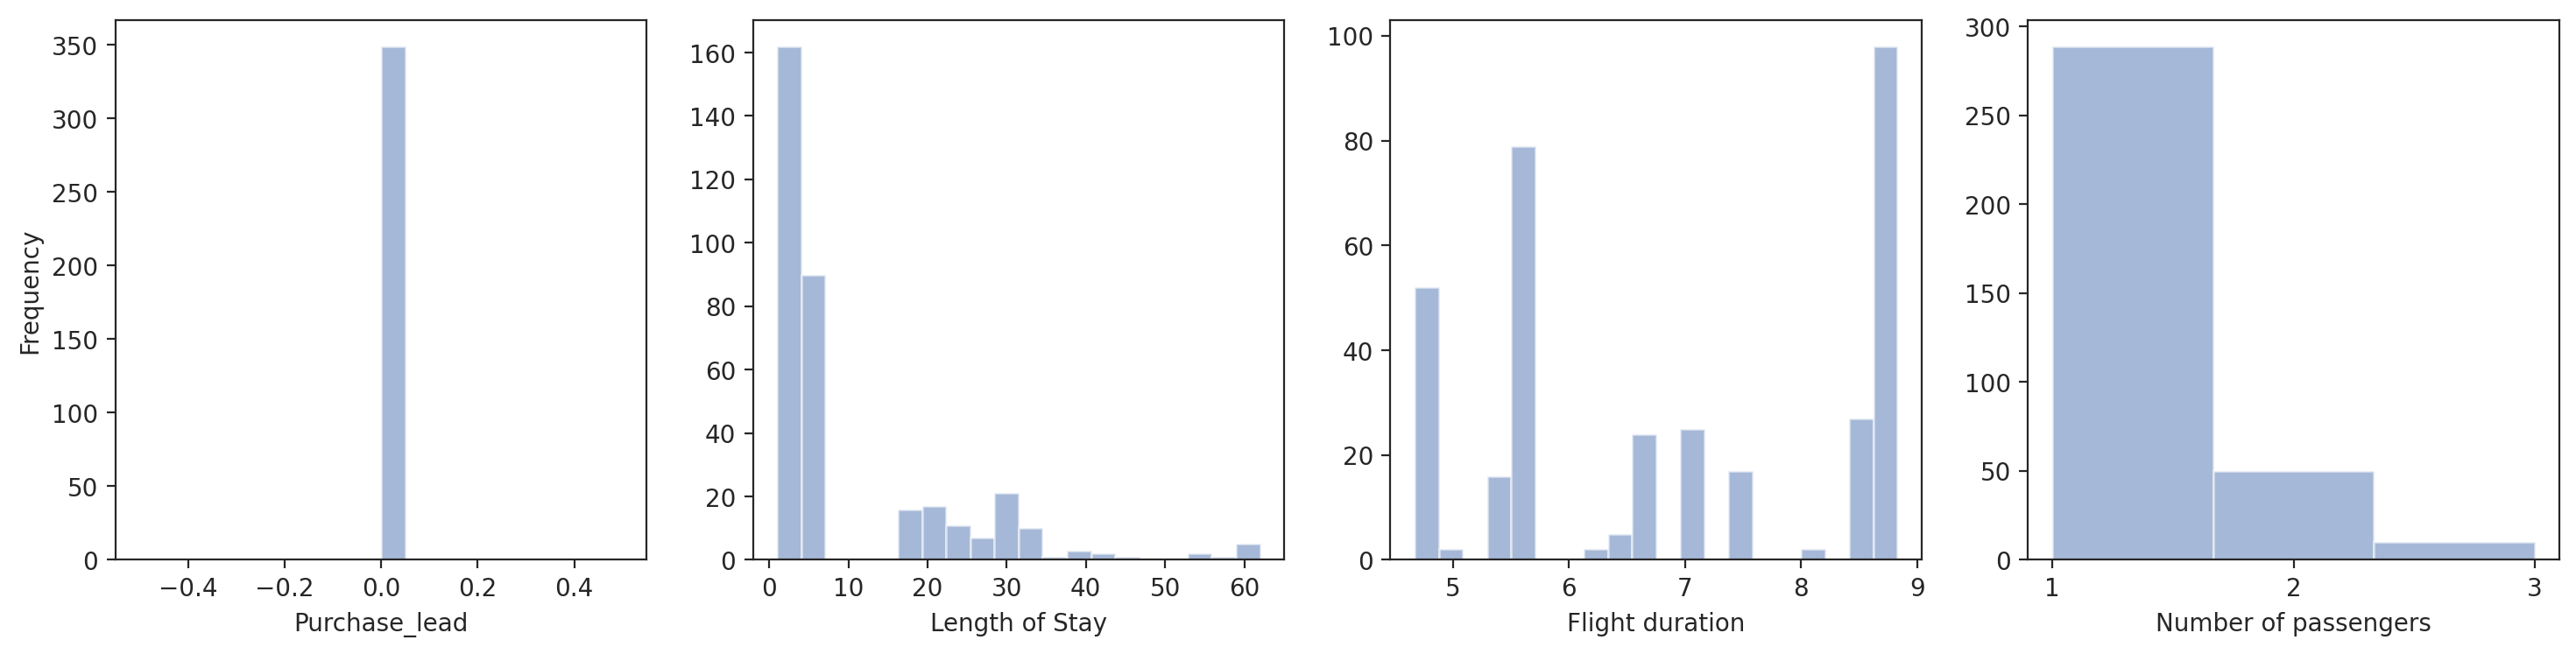

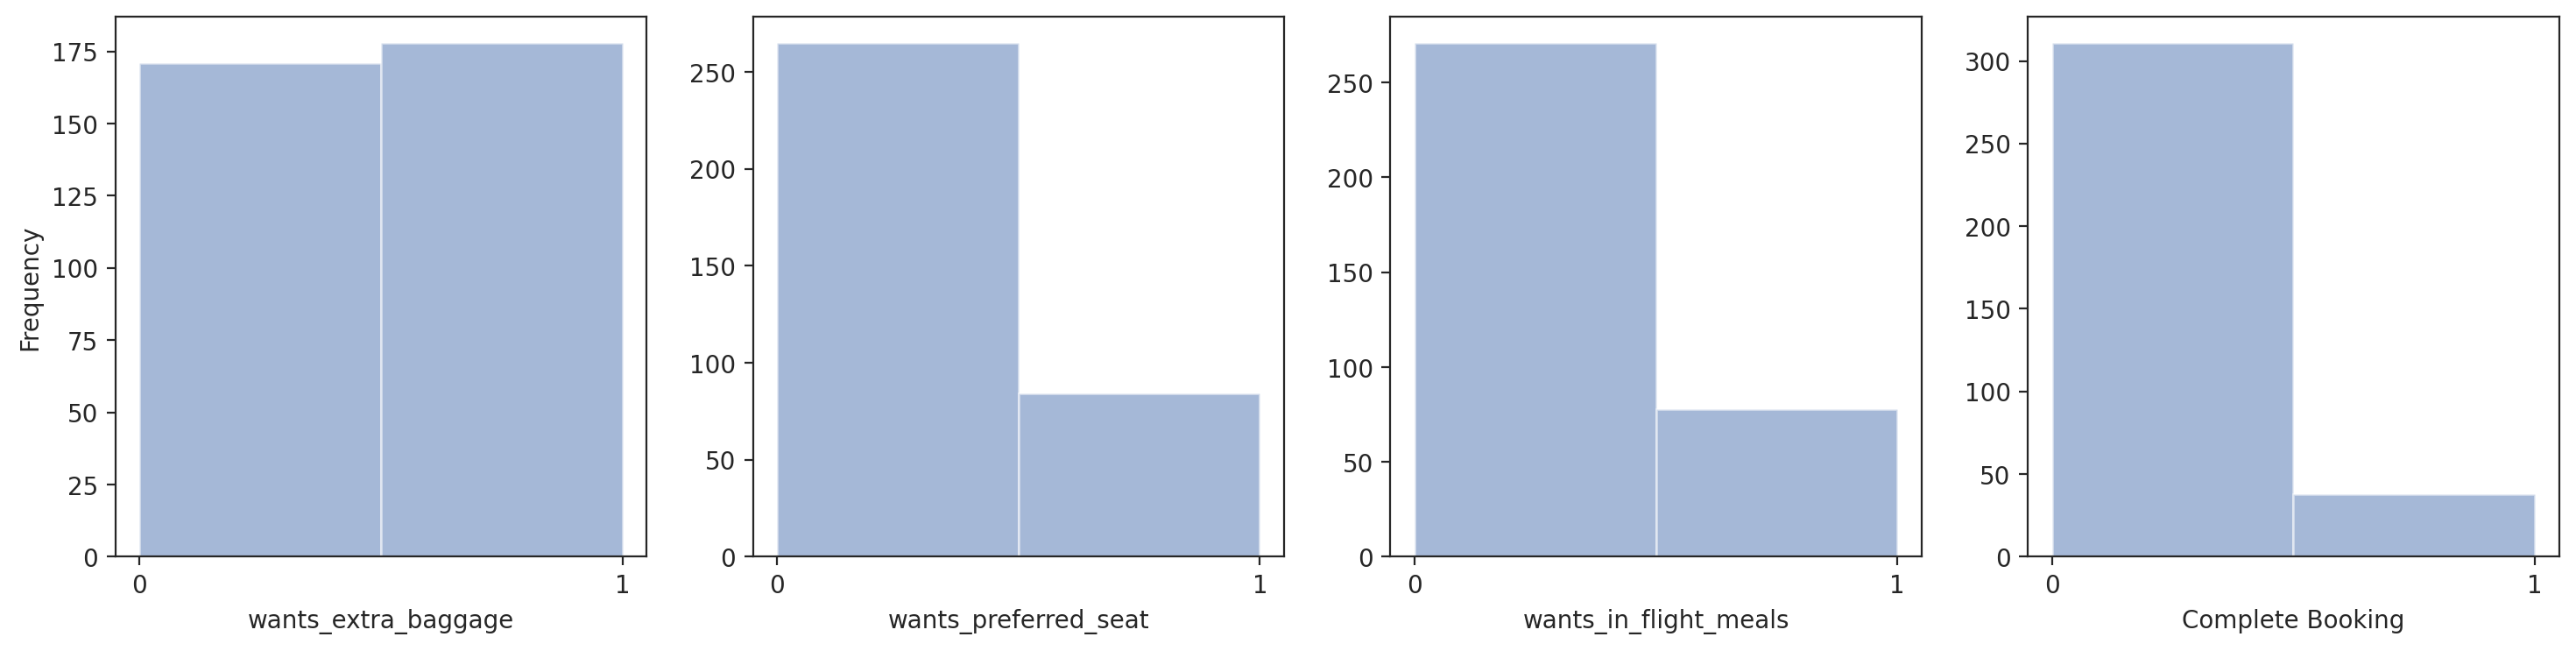

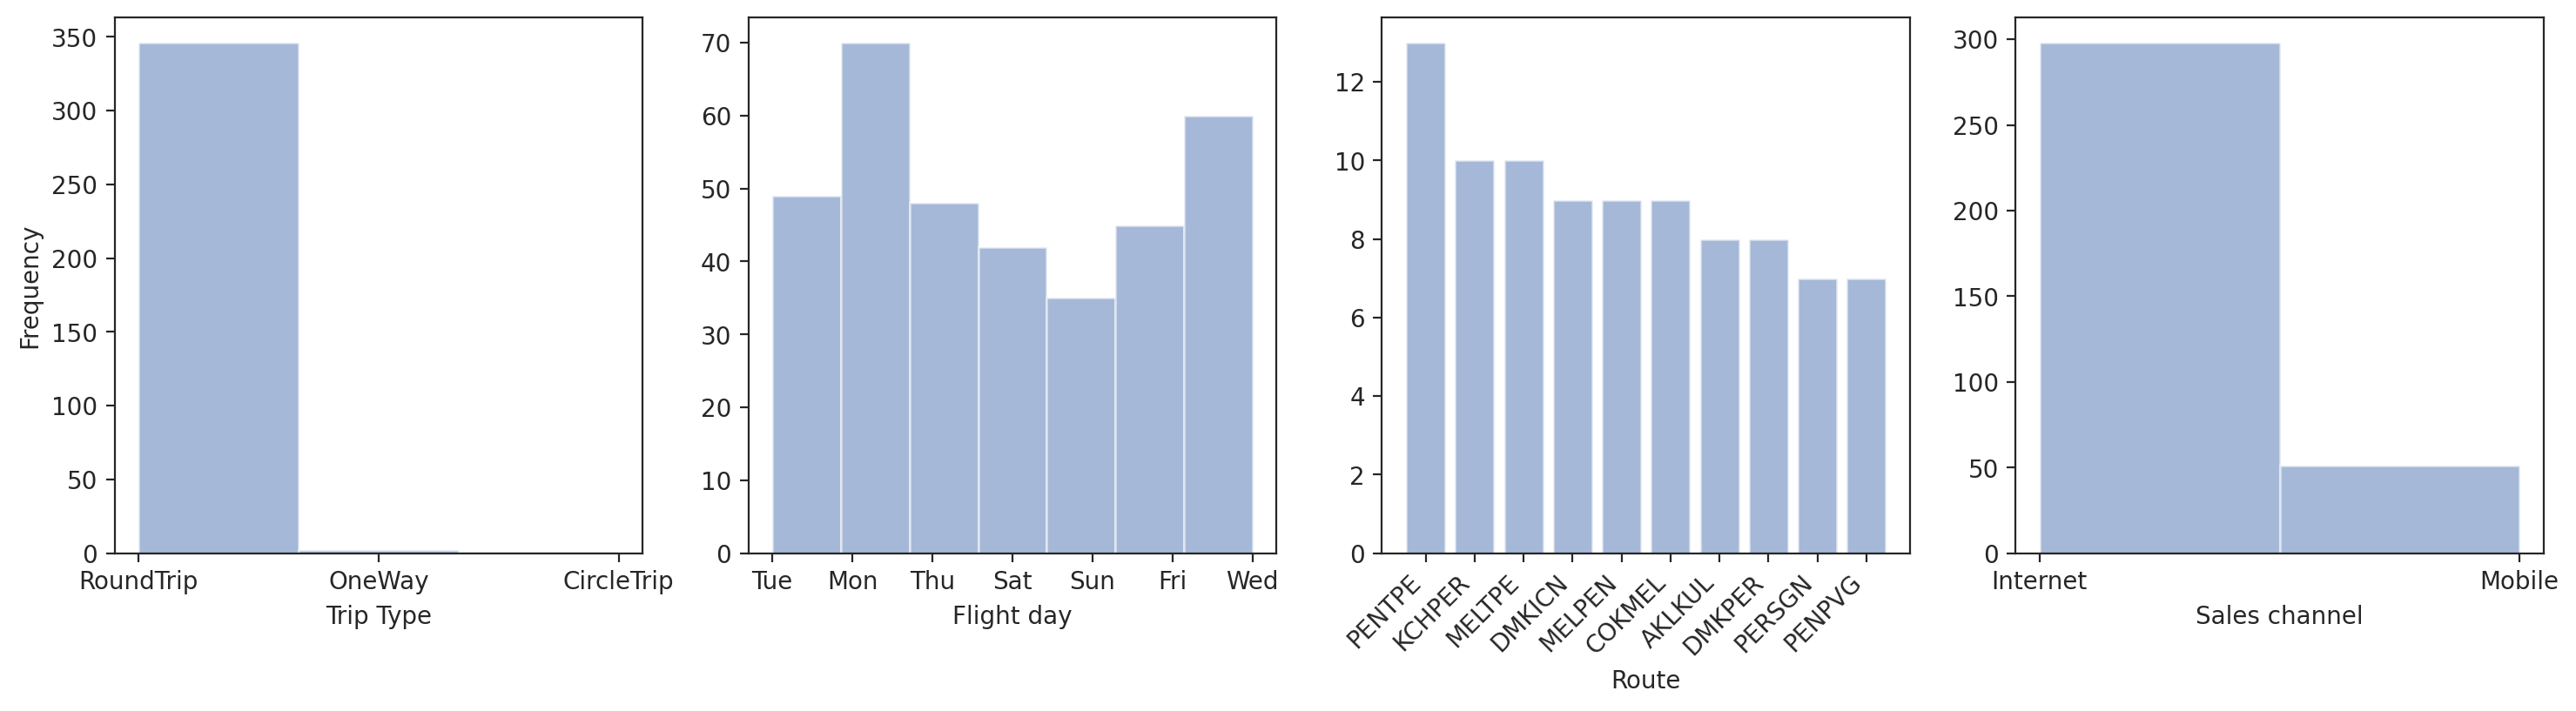

In [ ]:
# Visualizing the distribution of continous columns
fig, axs = plt.subplots(1, 4, figsize=(18, 4))
axs[0].hist(customersameday['purchase_lead'], bins=20, alpha = 0.5)
axs[0].set_xlabel('Purchase_lead')
axs[0].set_ylabel('Frequency')
axs[0].ticklabel_format(style='plain')
axs[1].hist(customersameday['length_of_stay'], bins=20, alpha = 0.5)
axs[1].set_xlabel('Length of Stay')
axs[1].ticklabel_format(style='plain')
axs[2].hist(customersameday['flight_duration'], bins=20, alpha = 0.5)
axs[2].set_xlabel('Flight duration');
axs[3].hist(customersameday['num_passengers'], bins=3, alpha = 0.5)
axs[3].set_xlabel('Number of passengers')
axs[3].set_xticks([1, 2, 3]);

# Visualizing the distribution of categorical columns
fig, axs = plt.subplots(1, 4, figsize=(18, 4))
axs[0].hist(customersameday['wants_extra_baggage'], bins=2, alpha = 0.5)
axs[0].set_xlabel('wants_extra_baggage')
axs[0].set_ylabel('Frequency')
axs[0].ticklabel_format(style='plain')
axs[0].set_xticks([0, 1])
axs[1].hist(customersameday['wants_preferred_seat'], bins=2, alpha = 0.5)
axs[1].set_xlabel('wants_preferred_seat')
axs[1].ticklabel_format(style='plain')
axs[1].set_xticks([0, 1])
axs[2].hist(customersameday['wants_in_flight_meals'], bins=2, alpha = 0.5)
axs[2].set_xlabel('wants_in_flight_meals')
axs[2].set_xticks([0, 1])
axs[3].hist(customersameday['booking_complete'], bins=2, alpha = 0.5)
axs[3].set_xlabel('Complete Booking')
axs[3].set_xticks([0, 1])

# Using groupby and size to calculate route frequencies
route_counts = customersameday.groupby('route').size().sort_values(ascending=False).head(10)
fig, axs = plt.subplots(1, 4, figsize=(18, 4))
axs[0].hist(customersameday['trip_type'], bins=3, alpha = 0.5)
axs[0].set_xlabel('Trip Type')
axs[0].set_ylabel('Frequency')
axs[1].hist(customersameday['flight_day'], bins=7, alpha = 0.5)
axs[1].set_xlabel('Flight day')
axs[2].bar(route_counts.index, route_counts.values, alpha=0.5)
axs[2].set_xlabel('Route')
axs[2].set_xticklabels(route_counts.index, rotation=45, ha='right')
axs[3].hist(customersameday['sales_channel'], bins=2, alpha = 0.5)
axs[3].set_xlabel('Sales channel');

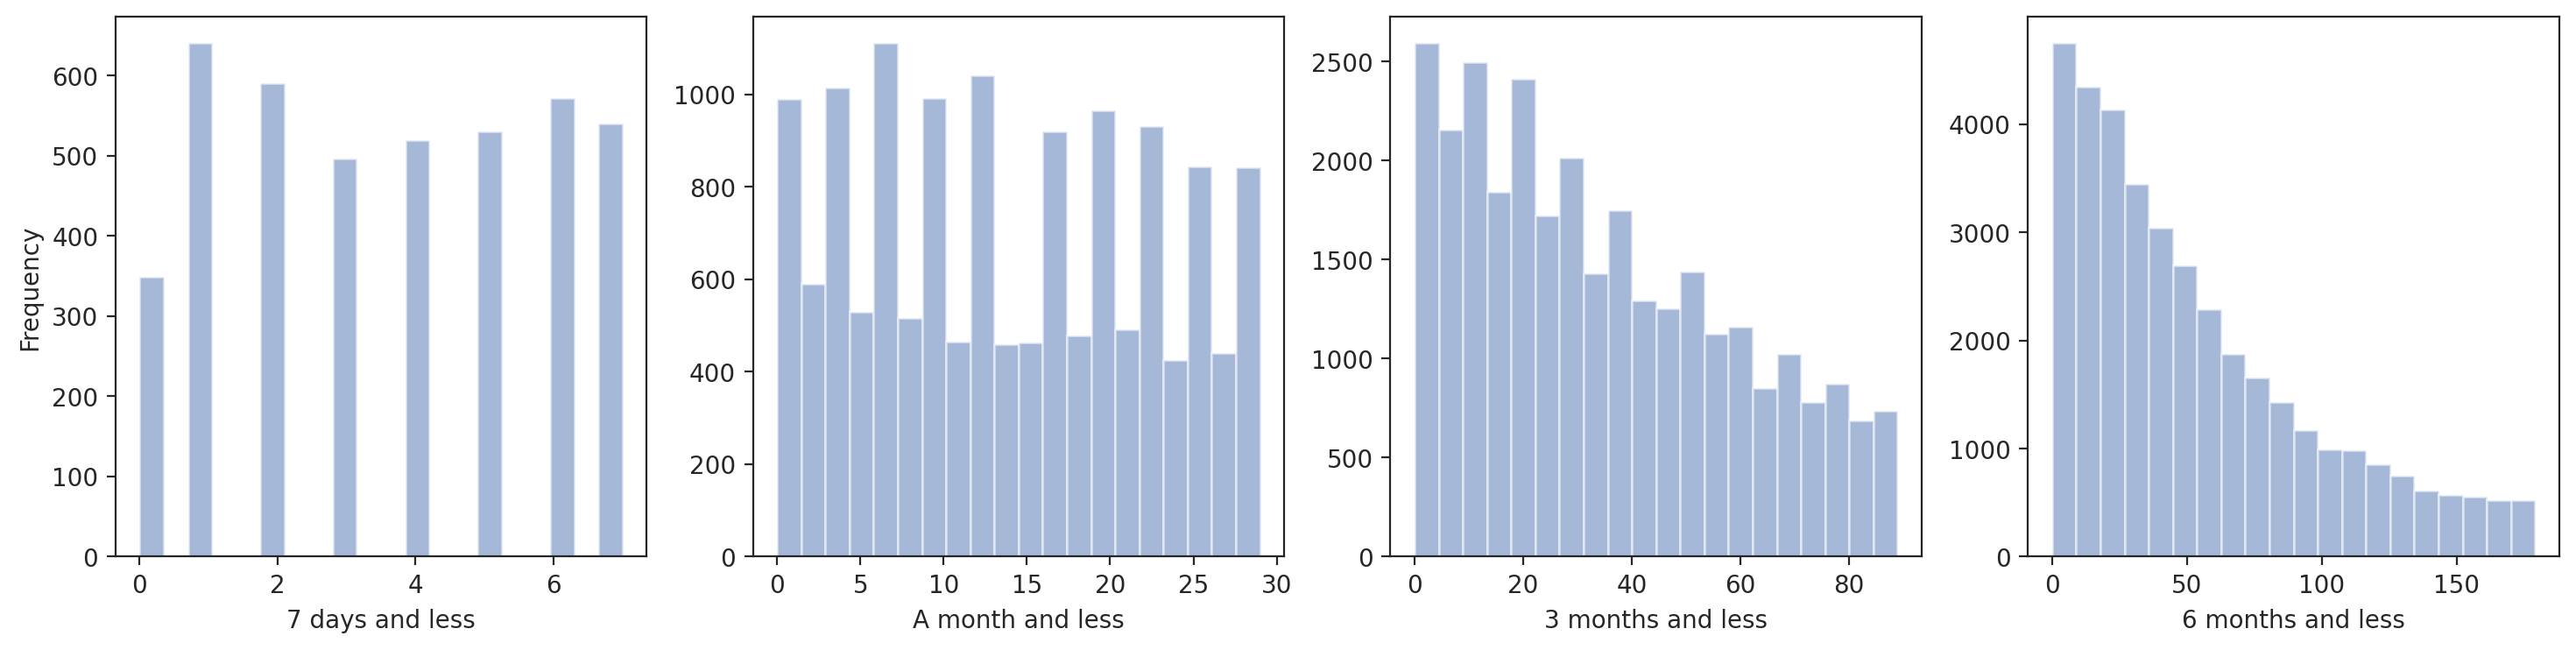

In [ ]:
# Comparing the purchase leads for different segments of customers
fig, axs = plt.subplots(1, 4, figsize=(18, 4))
axs[0].hist(customerlastmin['purchase_lead'], bins=20, alpha = 0.5)
axs[0].set_xlabel('7 days and less')
axs[0].set_ylabel('Frequency')
axs[0].ticklabel_format(style='plain')
axs[1].hist(customer1['purchase_lead'], bins=20, alpha = 0.5)
axs[1].ticklabel_format(style='plain')
axs[1].set_xlabel('A month and less')
axs[2].hist(customer3['purchase_lead'], bins=20, alpha = 0.5)
axs[2].set_xlabel('3 months and less')
axs[3].hist(customer6['purchase_lead'], bins=20, alpha = 0.5)
axs[3].set_xlabel('6 months and less');

Upon exploring the data from a holistic or annual level, a significant portion of passengers tend to book closer to their travel dates which could be explained as a result of certainty. It is important to note that most customers in this dataset purchase round-trip tickets which may significantly impact their decision to book closer to their travel dates as there are higher chances of certainty in the short term than in the long run thereby aiding their decision in travel date selection as well as their length of stay, for which a relatively substantial number travel briefly, which communicates business or short holidays.

While it is observed that most customers are lone travellers, it becomes even more pronounced for last-minute travellers. It is equally observed that well planned travellers tend to want extra luggage nonetheless, the less request by last minute passengers neutralizes the gap in this segment. Just as there is remarkable difference between both segments of customers in requesting for extra luggage, so also is the case for in flight meals. The last minute travellers are more concerned about arriving at their destination with little or no attention to the perks of the flight.

Regardless of the traveller segment, Monday is considered the busiest day of travels, followed by Wednesday, then Tuesday, Thursday, Friday, with Saturday the least trips for a year and below customers while Sunday for last minute travellers. By route, the Penang - Taipee route appear to be most popular for the last minute customers and New Zealand  - Malaysia route for the long planned travellers.

## Model Building

## Split the dataset columns into dependent and independent variables

In [ ]:
sample = customer_booking.sample(frac = 0.5, random_state =0)
y = sample['booking_complete']
X = sample.drop('booking_complete', axis=1)

 Categorization of the independent variables into numerical and categorical columns for transformation

In [ ]:
# numerical columns
numerical_cols = X.select_dtypes(exclude='object').columns.tolist()
print(numerical_cols)

['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration']


In [ ]:
# categorical columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()
print(categorical_cols)

['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']


It would be noticed that among the variables categorization, some categorical columns were misplaced as numerical due to 1s and 0s. Hence, the following steps are taken to correct that.

In [ ]:
# redefining numerical categorical columns
encoded_categorical_features = ['wants_extra_baggage',	'wants_preferred_seat',	'wants_in_flight_meals']
for col in encoded_categorical_features:
    if col in numerical_cols:
        numerical_cols.remove(col)
        categorical_cols.append(col)

In [ ]:
print(numerical_cols)

['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']


Feature engineering using pipeline

In [ ]:
# preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ("te", TargetEncoder())
])
# preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ("poly", PolynomialFeatures(degree = 2, include_bias = False))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
])

In [ ]:
# Splitting the dataframe into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify = y)

# Random Forest Classifier Model

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
# further splitting the train dataframe into training and validation sets in each stratified Kfold
val_scores = []
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    X_train_fold = preprocessor.fit_transform(X_train_fold, y_train_fold)
    X_val_fold = preprocessor.transform(X_val_fold)

    # model instantiation
    rf = RandomForestClassifier(random_state=0)
    # train the model
    rf.fit(X_train_fold, y_train_fold)

    # validate the model
    y_pred = rf.predict(X_val_fold)
    fold_score = accuracy_score(y_val_fold, y_pred)
    val_scores.append(fold_score)

# Calculate the mean validation score
mean_val_score = sum(val_scores) / len(val_scores)
print(f"The average validation score across all folds: {mean_val_score}")

The average validation score across all folds: 0.8444809733639069


In [ ]:
# transforming the test data using the parameters obtained during training
X_test_processed = preprocessor.transform(X_test)

# predicting on the test set
y_test_pred = rf.predict(X_test_processed)

# model evaluation on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Model metrics
print(f"Accuracy score: {test_accuracy}")
print(f"Recall score: {test_recall}")
print(f"Precision score: {test_precision}")
print(f"F1 score: {test_f1}")

Accuracy score: 0.8493985829625968
Recall score: 0.8493985829625968
Precision score: 0.8082373355941408
F1 score: 0.8067726964651865


# Leveraging on the Feature Importances function in Random forest to see how individual variables contributed to the model

In [ ]:
# extracting feature importances
importances = rf.feature_importances_

# get feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()

# presenting it in a DataFrame
feature_importance_df = pd.DataFrame({'Feature': feature_names,'Importance': importances}).sort_values(by='Importance', ascending=False)

feature_importance_df.head(10)

,Feature,Importance
23,cat__route,0.135710
24,cat__booking_origin,0.080703
11,num__purchase_lead length_of_stay,0.054928
12,num__purchase_lead flight_hour,0.054888
13,num__purchase_lead flight_duration,0.053828
6,num__num_passengers purchase_lead,0.049983
15,num__length_of_stay flight_hour,0.046410
1,num__purchase_lead,0.046262
10,num__purchase_lead^2,0.045832
18,num__flight_hour flight_duration,0.045277


# GradientBoosting Classifier model

In [ ]:
# further splitting the train dataframe into training and validation sets in each stratified Kfold
val_scores = []
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    X_train_fold = preprocessor.fit_transform(X_train_fold, y_train_fold)
    X_val_fold = preprocessor.transform(X_val_fold)

    # model instantiation
    gb = GradientBoostingClassifier(random_state=0)
    # train the model
    gb.fit(X_train_fold, y_train_fold)

    # validate the model
    y_pred = gb.predict(X_val_fold)
    fold_score = accuracy_score(y_val_fold, y_pred)
    val_scores.append(fold_score)

# Calculate the mean validation score
mean_val_score = sum(val_scores) / len(val_scores)
print(f"The average validation score across all folds: {mean_val_score}")

The average validation score across all folds: 0.846105167366146


In [ ]:
# transforming the test data using the parameters obtained during training
X_test_processed = preprocessor.transform(X_test)

# predicting on the test set
y_test_pred = gb.predict(X_test_processed)

# model evaluation on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Model metrics
print(f"Accuracy score: {test_accuracy}")
print(f"Recall score: {test_recall}")
print(f"Precision score: {test_precision}")
print(f"F1 score: {test_f1}")

Accuracy score: 0.8505519855000824
Recall score: 0.8505519855000824
Precision score: 0.8105306560049866
F1 score: 0.8056442956787705


# Naive bayes Model

In [ ]:
from sklearn.naive_bayes import GaussianNB

# further splitting the train dataframe into training and validation sets in each stratified Kfold
val_scores = []
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    X_train_fold = preprocessor.fit_transform(X_train_fold, y_train_fold)
    X_val_fold = preprocessor.transform(X_val_fold)

    # model instantiation
    nb = GaussianNB()
    # train the model
    nb.fit(X_train_fold, y_train_fold)

    # validate the model
    y_pred = nb.predict(X_val_fold)
    fold_score = accuracy_score(y_val_fold, y_pred)
    val_scores.append(fold_score)

# Calculate the mean validation score
mean_val_score = sum(val_scores) / len(val_scores)
print(f"The average validation score across all folds: {mean_val_score}")

The average validation score across all folds: 0.7093024764162711


In [ ]:
# transforming the test data using the parameters obtained during training
X_test_processed = preprocessor.transform(X_test)

# predicting on the test set
y_test_pred = nb.predict(X_test_processed)

# model evaluation on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Model metrics
print(f"Accuracy score: {test_accuracy}")
print(f"Recall score: {test_recall}")
print(f"Precision score: {test_precision}")
print(f"F1 score: {test_f1}")

Accuracy score: 0.7187345526445873
Recall score: 0.7187345526445873
Precision score: 0.775360437292759
F1 score: 0.7427024616045256


# KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
 # further splitting the train dataframe into training and validation sets in each stratified Kfold
val_scores = []
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    X_train_fold = preprocessor.fit_transform(X_train_fold, y_train_fold)
    X_val_fold = preprocessor.transform(X_val_fold)

    # model instantiation
    knn = KNeighborsClassifier()
    # train the model
    knn.fit(X_train_fold, y_train_fold)

    # validate the model
    y_pred = knn.predict(X_val_fold)
    fold_score = accuracy_score(y_val_fold, y_pred)
    val_scores.append(fold_score)

# Calculate the mean validation score
mean_val_score = sum(val_scores) / len(val_scores)
print(f"The average validation score across all folds: {mean_val_score}")

The average validation score across all folds: 0.8280949465861218


In [ ]:
# transforming the test data using the parameters obtained during training
X_test_processed = preprocessor.transform(X_test)

# predicting on the test set
y_test_pred = knn.predict(X_test_processed)

# model evaluation on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Model metrics
print(f"Accuracy score: {test_accuracy}")
print(f"Recall score: {test_recall}")
print(f"Precision score: {test_precision}")
print(f"F1 score: {test_f1}")

Accuracy score: 0.8273191629593014
Recall score: 0.8273191629593014
Precision score: 0.7486821838709908
F1 score: 0.7779713985019638


# Voting Classifier Model

In [ ]:
# further splitting the train dataframe into training and validation sets in each stratified Kfold
val_scores = []
for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    X_train_fold = preprocessor.fit_transform(X_train_fold, y_train_fold)
    X_val_fold = preprocessor.transform(X_val_fold)

    # model instantiation
    vc = VotingClassifier(estimators=[('gb', GradientBoostingClassifier(random_state=0)), ('rf', RandomForestClassifier(random_state=0)), ('nb', GaussianNB()), ('knn', KNeighborsClassifier())], voting='hard')
    # train the model
    vc.fit(X_train_fold, y_train_fold)

    # validate the model
    y_pred = vc.predict(X_val_fold)
    fold_score = accuracy_score(y_val_fold, y_pred)
    val_scores.append(fold_score)

# Calculate the mean validation score
mean_val_score = sum(val_scores) / len(val_scores)
print(f"The average validation score across all folds: {mean_val_score}")

The average validation score across all folds: 0.8482946324690124


In [ ]:
# transforming the test data using the parameters obtained during training
X_test_processed = preprocessor.transform(X_test)

# predicting on the test set
y_test_pred = vc.predict(X_test_processed)

# model evaluation on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Model metrics
print(f"Accuracy score: {test_accuracy}")
print(f"Recall score: {test_recall}")
print(f"Precision score: {test_precision}")
print(f"F1 score: {test_f1}")

Accuracy score: 0.8497281265447355
Recall score: 0.8497281265447355
Precision score: 0.8070923870325439
F1 score: 0.7893112885044632
